# Lending Club - Interest Rate Predictor

## Current Notebook: 2_Exploratory_Data_Analysis

---
**Author:** Rohit Singh
<br/>
[GitHub](https://github.com/RohitSinghHQ) | [LinkedIn](https://www.linkedin.com/in/RohitSinghHQ)
<br/>
<br/>
**Project:** Lending Club - Interest Rate Predictor
<br/>
<br/>
**Previous Notebook:** 1_Preprocessing
<br/>
**Current Notebook:** 2_Exploratory_Data_Analysis
<br/>
**Next Notebook:** 3_Model_Prep

---
## Table of Contents

[1. Data Import](#1)
<br/>
[2. Exploratory Data Analysis (EDA)](#2)
<br/>
- [2.1 `emp_title` column](#2.1)
<br/>
- [2.2 `emp_length` column](#2.2)
<br/>
- [2.3 `mort_acc` column](#2.3)
<br/>
- [2.4 `num_sats` column](#2.4)
<br/>
- [2.5 `num_bc_sats` column](#2.5)
<br/>
- [2.6 `zip_code` column](#2.6)
<br/>
- [2.7 `addr_state` column](#2.7)
<br/>
- [2.8 `int_rate` column](#2.8)
<br/>
- [2.9 `loan_amnt` column](#2.9)
<br/>
- [2.10 `term` column](#2.10)
<br/>
- [2.11 `home_ownership` column](#2.11)
<br/>
- [2.12 `annual_inc` column](#2.12)
<br/>
- [2.13 `verification_status` column](#2.13)
<br/>
- [2.14 `purpose` column](#2.14)
<br/>
- [2.15 `dti` column](#2.15)
<br/>
- [2.16 `fico_range_low`, `fico_range_high` column](#2.16)
<br/>
- [2.17 `open_acc` column](#2.17)
<br/>
- [2.18 `total_acc` column](#2.18)
<br/>
- [2.19 `disbursement_method` column](#2.19)
<br/>
- [2.20 `pub_rec` column](#2.20)
<br/>
- [2.21 `pub_rec_bankruptcies` column](#2.21)
<br/>
- [2.22 `tax_liens` column](#2.22)
<br/>

[3. Data Export](#3)

---
<a id="1"></a>
## 1. Data Import

In [1]:
# Import packages
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Let us import the reduced-size `dfa_eda` data frame.

In [2]:
# Load data frame
dfa_eda = joblib.load('data/dfa_eda.pkl')

In [3]:
# Check data frame shape
print(f'There are {dfa_eda.shape[0]} rows and {dfa_eda.shape[1]} columns.')

There are 2139958 rows and 23 columns.


In [4]:
# Check sample
dfa_eda.sample(5)

,int_rate,loan_amnt,term,purpose,annual_inc,verification_status,home_ownership,zip_code,addr_state,emp_title,...,fico_range_high,pub_rec,pub_rec_bankruptcies,open_acc,total_acc,mort_acc,num_sats,num_bc_sats,tax_liens,disbursement_method
803818,10.47,2000.0,36 months,other,33500.0,Not Verified,OWN,283xx,NC,Lab Tech,...,784.0,0.0,0.0,16.0,32.0,0.0,16.0,8.0,0.0,Cash
1522758,7.46,29000.0,60 months,credit_card,120185.0,Source Verified,MORTGAGE,297xx,SC,High School Principal,...,694.0,0.0,0.0,16.0,35.0,3.0,16.0,7.0,0.0,DirectPay
292450,7.89,7000.0,36 months,debt_consolidation,37000.0,Source Verified,RENT,338xx,FL,Admin/Realtor,...,724.0,0.0,0.0,6.0,9.0,0.0,6.0,2.0,0.0,Cash
1933519,6.03,6000.0,36 months,wedding,60000.0,Not Verified,RENT,193xx,PA,Datatel+SGHE,...,759.0,0.0,0.0,16.0,21.0,NaN,NaN,NaN,0.0,Cash
2239688,11.44,8000.0,36 months,debt_consolidation,110000.0,Verified,RENT,105xx,NY,Assistant Principal,...,689.0,0.0,0.0,12.0,25.0,2.0,12.0,4.0,0.0,Cash


The data frame seems to have loaded correctly.

In [5]:
# Check data types
dfa_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2139958 entries, 0 to 2260698
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   int_rate              float64
 1   loan_amnt             float64
 2   term                  object 
 3   purpose               object 
 4   annual_inc            float64
 5   verification_status   object 
 6   home_ownership        object 
 7   zip_code              object 
 8   addr_state            object 
 9   emp_title             object 
 10  emp_length            object 
 11  dti                   float64
 12  fico_range_low        float64
 13  fico_range_high       float64
 14  pub_rec               float64
 15  pub_rec_bankruptcies  float64
 16  open_acc              float64
 17  total_acc             float64
 18  mort_acc              float64
 19  num_sats              float64
 20  num_bc_sats           float64
 21  tax_liens             float64
 22  disbursement_method   object 
dtypes: floa

In [6]:
# Check for null values
dfa_eda.isna().sum()

int_rate                     0
loan_amnt                    0
term                         0
purpose                      0
annual_inc                   4
verification_status          0
home_ownership               0
zip_code                     1
addr_state                   0
emp_title               148559
emp_length              130357
dti                          0
fico_range_low               0
fico_range_high              0
pub_rec                     29
pub_rec_bankruptcies      1365
open_acc                    29
total_acc                   29
mort_acc                 50030
num_sats                 58590
num_bc_sats              58590
tax_liens                  105
disbursement_method          0
dtype: int64

In [7]:
# Check for null values percent
(dfa_eda.isna().mean()*100).round(4)

int_rate                0.0000
loan_amnt               0.0000
term                    0.0000
purpose                 0.0000
annual_inc              0.0002
verification_status     0.0000
home_ownership          0.0000
zip_code                0.0000
addr_state              0.0000
emp_title               6.9421
emp_length              6.0916
dti                     0.0000
fico_range_low          0.0000
fico_range_high         0.0000
pub_rec                 0.0014
pub_rec_bankruptcies    0.0638
open_acc                0.0014
total_acc               0.0014
mort_acc                2.3379
num_sats                2.7379
num_bc_sats             2.7379
tax_liens               0.0049
disbursement_method     0.0000
dtype: float64

We still have null values in our columns. We will go through each column one-by-one, starting with the ones with null values.

---
<a id="2"></a>
## 2. Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) refers to the critical process of performing initial investigations on data so as to discover patterns, spot anomalies, test hypothesis, and check assumptions with the help of summary statistics and graphical representations.

This is where we check, explore, and make any necessary changes to the columns in our data frame to get them ready for the machine learning models.

---
<a id="2.1"></a>
#### 2.1 `emp_title` column

This column shows the job title supplied by the borrower when applying for the loan.

Let us first check for null values.

In [8]:
# Check for null values
dfa_eda['emp_title'].isna().sum()

148559

In [9]:
# Check for null values percent
((dfa_eda['emp_title'].isna().sum() / dfa_eda.shape[0]) * 100), dfa_eda.shape[0]

(6.942145593511648, 2139958)

148,559 (~6.94%) rows have null values. We need to dig deeper.

Let us start by looking at unique values.

In [10]:
# Check for unique values
dfa_eda['emp_title'].nunique()

496895

There are ~496k (496,895) unique values in the `emp_title` column. However, some of them could include duplicates, duplicates with white spaces, different capitalization, etc.

Let us try converting all entries to lowercase capitalization to reduce duplication.

In [11]:
# Convert to lowercase
dfa_eda['emp_title'] = dfa_eda['emp_title'].str.lower()

In [12]:
# Check for unique values
dfa_eda['emp_title'].nunique()

425426

In [13]:
# Check sample
dfa_eda['emp_title'].sample(10)

1574762    inteventional radiologic technologist 
41540                                head cashier
2170539                            medical biller
1895185                          michael rose cpa
2056188                                sr. hr mgr
1886032                          social security 
2124564                         solutions manager
1668249                      big data & analytics
1197111                        member service rep
1240858                               it director
Name: emp_title, dtype: object

The number of unique values has gone down but is still very high at >425k (425,426).

Even if we try to group together multiple entries like various managers, various C-suite executives, it would be impossible to come up with a sane number to properly apply OneHotEncoder to this column.

❌ We will drop the `emp_title` column for now.

In [14]:
# Drop column
dfa_eda.drop(['emp_title'], axis=1, inplace=True)

In [15]:
# Check data frame shape
print(f'There are {dfa_eda.shape[0]} rows and {dfa_eda.shape[1]} columns.')

There are 2139958 rows and 22 columns.


---
<a id="2.2"></a>
#### 2.2 `emp_length` column

This column shows the employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

Let us start by looking at unique values.

In [16]:
# Check for unique values
dfa_eda['emp_length'].unique()

array(['10+ years', '3 years', '4 years', '6 years', '1 year', '7 years',
       '8 years', '5 years', '2 years', '9 years', '< 1 year', nan],
      dtype=object)

In [17]:
# Check counts
dfa_eda['emp_length'].value_counts()

10+ years    714464
2 years      194839
3 years      172785
< 1 year     167907
1 year       142364
5 years      133536
4 years      130624
6 years       98460
7 years       89307
8 years       88634
9 years       76681
Name: emp_length, dtype: int64

We have already dropped the `emp_title` column above. It doesn't make much logical sense to keep the `emp_length` column.

For example, 5 years of employment as an Analyst vs. 5 years of employment as a C-suite executive cannot be put in the same category for calculating/predicting loan interest rates.

If we had kept the `emp_title` column, it would have made more sense to keep the `emp_length` column as well.

❌ We will drop the `emp_length` column for now.

In [18]:
# Drop column
dfa_eda.drop(['emp_length'], axis=1, inplace=True)

In [19]:
# Check data frame shape
print(f'There are {dfa_eda.shape[0]} rows and {dfa_eda.shape[1]} columns.')

There are 2139958 rows and 21 columns.


---
<a id="2.3"></a>
#### 2.3 `mort_acc` column

This column shows the number of mortgage accounts.

Let us first check for null values.

In [20]:
# Check for null values
dfa_eda['mort_acc'].isna().sum()

50030

In [21]:
# Check for null values percent
((dfa_eda['mort_acc'].isna().sum() / dfa_eda.shape[0]) * 100), dfa_eda.shape[0]

(2.3378963512368003, 2139958)

50,030 (~2.34%) rows have null values.

Ideally, we would like to fill in the null values. But, due to mortgages having a noticeable impact on a borrower's credit-worthiness/loan-repayment capacity, this is a sensitive data point. It's better to drop the null rows than to dilute the data.

We will drop these rows for now.

In [22]:
# Drop null values
dfa_eda.dropna(subset=['mort_acc'], inplace=True)

In [23]:
# Check for null values
dfa_eda['mort_acc'].isna().sum()

0

There are no more null values in the `mort_acc` column.

In [24]:
# Check sample
dfa_eda['mort_acc'].sample(5)

117389     2.0
385099     3.0
524192     0.0
2106967    5.0
489126     3.0
Name: mort_acc, dtype: float64

This is a numerical column.

Let us try to visualize the data.

<Figure size 800x600 with 0 Axes>

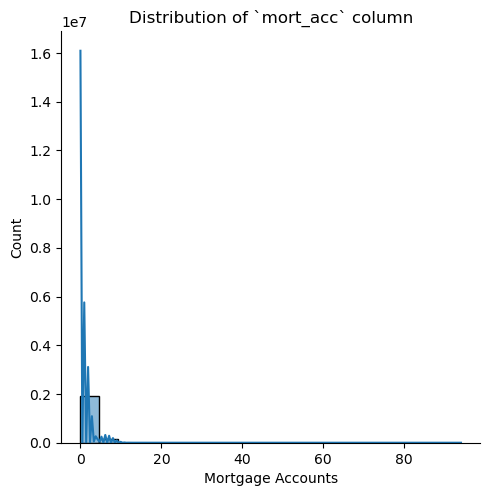

In [25]:
# Check distribution

# Create plot
plt.figure(figsize=(8,6))
sns.displot(data=dfa_eda, x='mort_acc', bins=20, kde=True, palette='pastel')

# Set title, label, legend
plt.title('Distribution of `mort_acc` column')
plt.xlabel('Mortgage Accounts')

# Show plot
plt.show()

The distribution seems to be right-skewed.

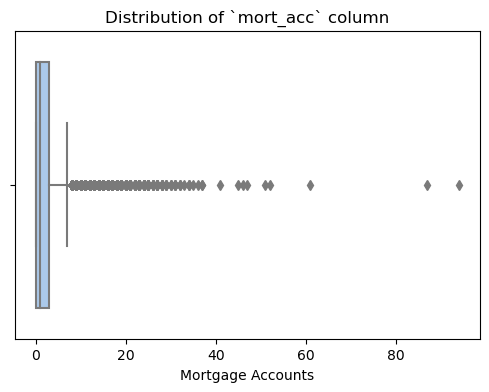

In [26]:
# Check distribution

# Create plot
plt.figure(figsize=(6,4))
sns.boxplot(data=dfa_eda, x='mort_acc', palette='pastel')

# Set title, label, legend
plt.title('Distribution of `mort_acc` column')
plt.xlabel('Mortgage Accounts')

# Show plot
plt.show()

There are outliers in the column.

In [27]:
# Check details
dfa_eda['mort_acc'].describe()

count    2.089928e+06
mean     1.542400e+00
std      1.910258e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      9.400000e+01
Name: mort_acc, dtype: float64

- Minimum number of mortgage accounts is 0
- Highest number of mortgage accounts is 94
- Mean number of mortgage accounts is ~1.54

We could try to remove some outliers here, but we are not sure on what parameters. We might end up removing important data.

✅ We will keep the `mort_acc` column for now.

---
<a id="2.4"></a>
#### 2.4 `num_sats` column

This column shows the number of satisfactory accounts.

Let us first check for null values.

In [28]:
# Check for null values
dfa_eda['num_sats'].isna().sum()

8560

In [29]:
# Check for null values percent
((dfa_eda['num_sats'].isna().sum() / dfa_eda.shape[0]) * 100), dfa_eda.shape[0]

(0.4095834880436073, 2089928)

8560 (~0.41%) rows have null values. We will drop these rows for now.

In [30]:
# Drop null values
dfa_eda.dropna(subset=['num_sats'], inplace=True)

In [31]:
# Check for null values
dfa_eda['num_sats'].isna().sum()

0

There are no more null values in the `num_sats` column.

In [32]:
# Check sample
dfa_eda['num_sats'].sample(5)

372145      5.0
61841      18.0
2068652     5.0
2058105     7.0
174192     14.0
Name: num_sats, dtype: float64

This is a numerical column.

Let us try to visualize the data.

<Figure size 800x600 with 0 Axes>

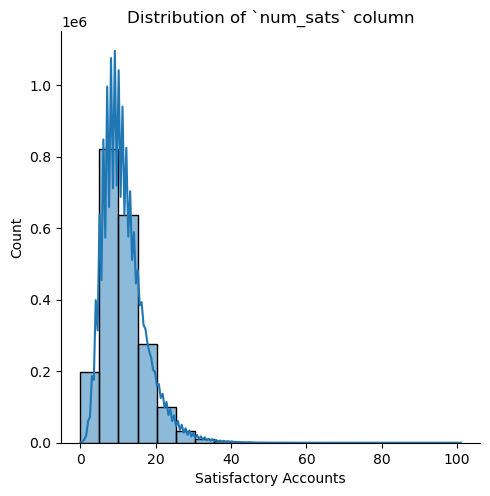

In [33]:
# Check distribution

# Create plot
plt.figure(figsize=(8,6))
sns.displot(data=dfa_eda, x='num_sats', bins=20, kde=True, palette='pastel')

# Set title, label, legend
plt.title('Distribution of `num_sats` column')
plt.xlabel('Satisfactory Accounts')

# Show plot
plt.show()

The distribution seems to be right-skewed.

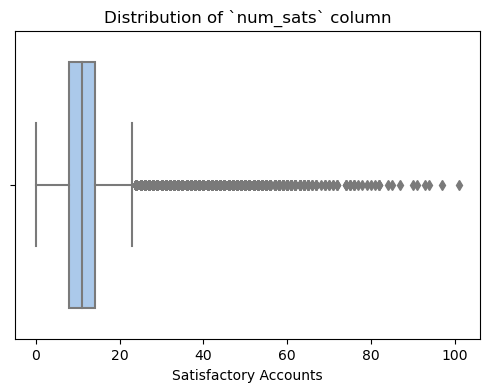

In [34]:
# Check distribution

# Create plot
plt.figure(figsize=(6,4))
sns.boxplot(data=dfa_eda, x='num_sats', palette='pastel')

# Set title, label, legend
plt.title('Distribution of `num_sats` column')
plt.xlabel('Satisfactory Accounts')

# Show plot
plt.show()

There are outliers in the column.

In [35]:
# Check details
dfa_eda['num_sats'].describe()

count    2.081368e+06
mean     1.165783e+01
std      5.646908e+00
min      0.000000e+00
25%      8.000000e+00
50%      1.100000e+01
75%      1.400000e+01
max      1.010000e+02
Name: num_sats, dtype: float64

- Minimum number of satisfactory accounts is 0
- Highest number of satisfactory accounts is 101
- Mean number of satisfactory accounts is ~11.66

We could try to remove some outliers, but we are not sure on what parameters. We might end up removing important data.

✅ We will keep the `num_sats` column for now.

---
<a id="2.5"></a>
#### 2.5 `num_bc_sats` column

This column shows the number of satisfactory bankcard accounts.

Let us first check for null values.

In [36]:
# Check for null values
dfa_eda['num_bc_sats'].isna().sum()

0

There are no null values in the `num_sats` column.

In [37]:
# Check sample
dfa_eda['num_bc_sats'].sample(5)

1008779    6.0
2251345    5.0
1039270    8.0
410250     1.0
143622     4.0
Name: num_bc_sats, dtype: float64

This is a numerical column.

Let us try to visualize the data.

<Figure size 800x600 with 0 Axes>

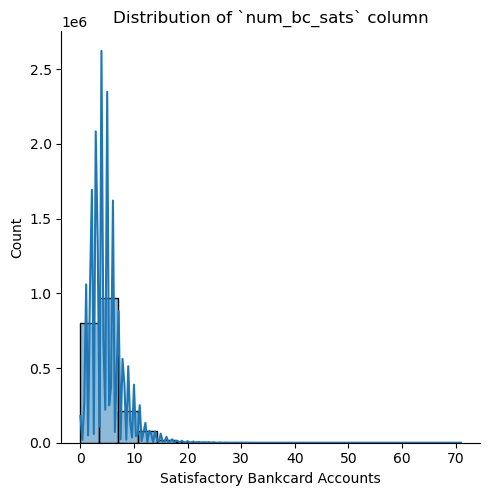

In [38]:
# Check distribution

# Create plot
plt.figure(figsize=(8,6))
sns.displot(data=dfa_eda, x='num_bc_sats', bins=20, kde=True, palette='pastel')

# Set title, label, legend
plt.title('Distribution of `num_bc_sats` column')
plt.xlabel('Satisfactory Bankcard Accounts')

# Show plot
plt.show()

The distribution seems to be right-skewed.

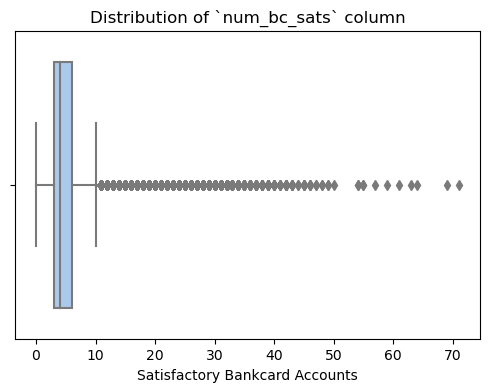

In [39]:
# Check distribution

# Create plot
plt.figure(figsize=(6,4))
sns.boxplot(data=dfa_eda, x='num_bc_sats', palette='pastel')

# Set title, label, legend
plt.title('Distribution of `num_bc_sats` column')
plt.xlabel('Satisfactory Bankcard Accounts')

# Show plot
plt.show()

There are outliers in the column.

In [40]:
# Check details
dfa_eda['num_bc_sats'].describe()

count    2.081368e+06
mean     4.808601e+00
std      3.047527e+00
min      0.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      6.000000e+00
max      7.100000e+01
Name: num_bc_sats, dtype: float64

- Minimum number of satisfactory bankcard accounts is 0
- Highest number of satisfactory bankcard accounts is 71
- Mean number of satisfactory bankcard accounts is ~4.81

We could try to remove some outliers, but we are not sure on what parameters. We might end up removing important data.

✅ We will keep the `num_bc_sats` column for now.

**Before we proceed, let us take a look at remaining null values in data frame.**

In [41]:
# Check for null values
dfa_eda.isna().sum()

int_rate                0
loan_amnt               0
term                    0
purpose                 0
annual_inc              0
verification_status     0
home_ownership          0
zip_code                1
addr_state              0
dti                     0
fico_range_low          0
fico_range_high         0
pub_rec                 0
pub_rec_bankruptcies    0
open_acc                0
total_acc               0
mort_acc                0
num_sats                0
num_bc_sats             0
tax_liens               0
disbursement_method     0
dtype: int64

Only `zip_code` column has 1 remaining null value. Let us fix that next.

---
<a id="2.6"></a>
#### 2.6 `zip_code` column

This column shows the first three numbers of the zip code provided by the borrower in the loan application.

Let us first check for null values.

In [42]:
# Check for null values
dfa_eda['zip_code'].isna().sum()

1

There is one row with null values. We can drop this single row.

In [43]:
# Drop null values
dfa_eda.dropna(subset=['zip_code'], inplace=True)

In [44]:
# Check for null values
dfa_eda['zip_code'].isna().sum()

0

There are no more null values in the `zip_code` column.

In [45]:
# Check sample
dfa_eda['zip_code'].sample(5)

1289618    641xx
528271     088xx
645185     130xx
1381764    945xx
500839     941xx
Name: zip_code, dtype: object

This is a categorical column.

Let us look at total unique values.

In [46]:
# Check total unique values
dfa_eda['zip_code'].nunique()

953

There are 953 unique values. It would not be practical to apply OneHotEncoder to this column.

We cannot convert them to a numerical column as these are Nominal numbers.

We could try to find ZIP-code based demographic data like average annual income or population and use it in our data set.

However, for the time being, we will simply drop this column. In the futue, we would ideally want to utilize some ZIP-code base demographic data for our analysis.

❌ We will drop the `zip_code` column for now.

In [47]:
# Drop column
dfa_eda.drop(['zip_code'], axis=1, inplace=True)

In [48]:
# Check data frame shape
print(f'There are {dfa_eda.shape[0]} rows and {dfa_eda.shape[1]} columns.')

There are 2081367 rows and 20 columns.


---
<a id="2.7"></a>
#### 2.7 `addr_state` column

This column shows the state provided by the borrower in the loan application.

**We have already cleared our data set of any null values. So, for remaining columns, we don't need to check for null values.**

In [49]:
# Check sample
dfa_eda['addr_state'].sample(5)

2046444    TN
1397477    NY
9937       MN
639453     NY
447873     MO
Name: addr_state, dtype: object

This is a categorical column.

Let us check for unique values.

In [50]:
# Check for unique values
dfa_eda['addr_state'].unique()

array(['PA', 'SD', 'NJ', 'GA', 'MN', 'SC', 'RI', 'TX', 'NC', 'CA', 'VA',
       'AZ', 'NY', 'IN', 'MD', 'KS', 'NM', 'AL', 'WA', 'MO', 'OH', 'LA',
       'IL', 'FL', 'CO', 'MI', 'TN', 'DC', 'MA', 'WI', 'HI', 'VT', 'DE',
       'NH', 'NE', 'CT', 'OR', 'AR', 'NV', 'WV', 'MT', 'WY', 'OK', 'KY',
       'MS', 'ME', 'UT', 'ND', 'AK', 'ID', 'IA'], dtype=object)

In [51]:
# Check for total unique values
dfa_eda['addr_state'].nunique()

51

There are 51 unique values in this column. They align with the fact that USA has 50 states. In the data frame, Washignton DC has been included as a state.

It would not be practical to apply OneHotEncoder to this column that has 51 unique values.

Just like the `zip_code` column above, ideally, we would want to utilize some state-based demographic data for our analysis. However, for the time being, we will simply drop this column.

❌ We will drop the `addr_state` column for now.

In [52]:
# Drop column
dfa_eda.drop(['addr_state'], axis=1, inplace=True)

In [53]:
# Check data frame shape
print(f'There are {dfa_eda.shape[0]} rows and {dfa_eda.shape[1]} columns.')

There are 2081367 rows and 19 columns.


---
<a id="2.8"></a>
#### 2.8 `int_rate` column

This column shows the interest rate on the loans.

**This is our target column - this is what we will be predicting.**

In [54]:
# Check sample
dfa_eda['int_rate'].sample(5)

1843327    19.05
554827     11.99
166675     14.65
46694      13.67
1038249    14.46
Name: int_rate, dtype: float64

This is a numerical column.

Let us now try to visualize the data.

<Figure size 800x600 with 0 Axes>

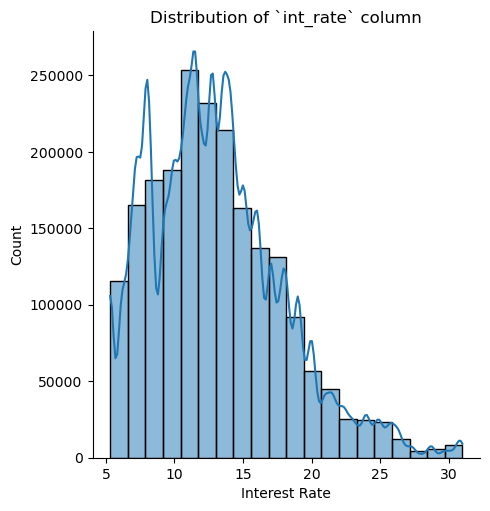

In [55]:
# Check distribution

# Create plot
plt.figure(figsize=(8,6))
sns.displot(data=dfa_eda, x='int_rate', bins=20, kde=True, palette='pastel')

# Set title, label, legend
plt.title('Distribution of `int_rate` column')
plt.xlabel('Interest Rate')

# Show plot
plt.show()

The distribution seems to be right-skewed.

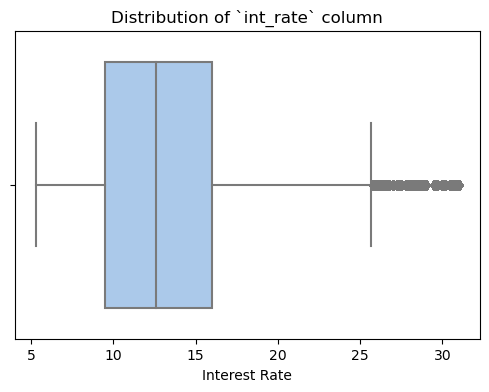

In [56]:
# Check distribution

# Create plot
plt.figure(figsize=(6,4))
sns.boxplot(data=dfa_eda, x='int_rate', palette='pastel')

# Set title, label, legend
plt.title('Distribution of `int_rate` column')
plt.xlabel('Interest Rate')

# Show plot
plt.show()

There are outliers in the column.

In [57]:
# Check details
dfa_eda['int_rate'].describe()

count    2.081367e+06
mean     1.308039e+01
std      4.817310e+00
min      5.310000e+00
25%      9.490000e+00
50%      1.262000e+01
75%      1.599000e+01
max      3.099000e+01
Name: int_rate, dtype: float64

- Lowest interest rate is ~5.31%
- Highest interest rate is ~30.99%
- Mean interest rate is ~13.08%

We will not make any changes to this column as it is our target column.

✅ We will keep the `int_rate` column for now.

---
<a id="2.9"></a>
#### 2.9 `loan_amnt` column

This column shows the listed amount of the loan applied for by the borrower.

In [58]:
# Check sample
dfa_eda['loan_amnt'].sample(5)

233151     25000.0
55893      14000.0
1230410    29000.0
976577     18000.0
946868      4600.0
Name: loan_amnt, dtype: float64

This is a numerical column.

Let us now try to visualize the data.

<Figure size 800x600 with 0 Axes>

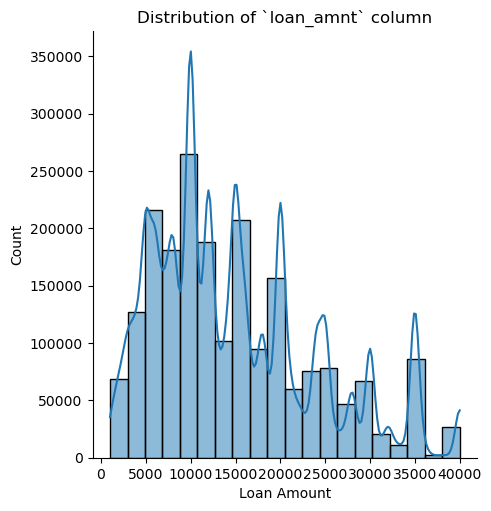

In [59]:
# Check distribution

# Create plot
plt.figure(figsize=(8,6))
sns.displot(data=dfa_eda, x='loan_amnt', bins=20, kde=True, palette='pastel')

# Set title, label, legend
plt.title('Distribution of `loan_amnt` column')
plt.xlabel('Loan Amount')

# Show plot
plt.show()

The distribution seems to be right-skewed.

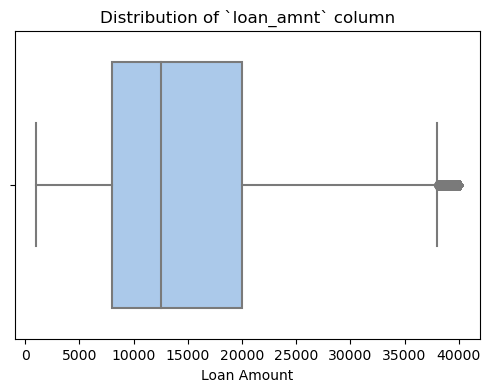

In [60]:
# Check distribution

# Create plot
plt.figure(figsize=(6,4))
sns.boxplot(data=dfa_eda, x='loan_amnt', palette='pastel')

# Set title, label, legend
plt.title('Distribution of `loan_amnt` column')
plt.xlabel('Loan Amount')

# Show plot
plt.show()

There are outliers in the column.

In [61]:
# Check details
dfa_eda['loan_amnt'].describe()

count    2.081367e+06
mean     1.487434e+04
std      9.055213e+03
min      1.000000e+03
25%      8.000000e+03
50%      1.250000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64

- Minimum loan amount is \\$1000
- Maximum loan amount is ~\\$40k (\\$40,000)
- Mean loan amount is ~\\$15k (\\$14,874.34)

We could try to remove some outliers, but we are not sure on what parameters. We might end up removing important data.

✅ We will keep the `loan_amnt` column for now.

---
<a id="2.10"></a>
#### 2.10 `term` column

This column shows the term or number of payments of the loan.

In [62]:
# Check sample
dfa_eda['term'].sample(5)

385649      36 months
1765348     36 months
973918      36 months
574648      36 months
2179439     36 months
Name: term, dtype: object

This is a categorical column.

Let us check for unique values.

In [63]:
# Check for unique values
dfa_eda['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

There are two categories of loan term:
- 36 months (3 years)
- 60 months (5 years)

We also notice whitespace at the start of each string. We need to remove the whitespace.

In [64]:
# Remove whitespace
dfa_eda['term'] = dfa_eda['term'].str.lstrip()

In [65]:
# Check for unique values
dfa_eda['term'].unique()

array(['36 months', '60 months'], dtype=object)

The whitespace at start of each string has been removed.

Let us now try to visualize the data.

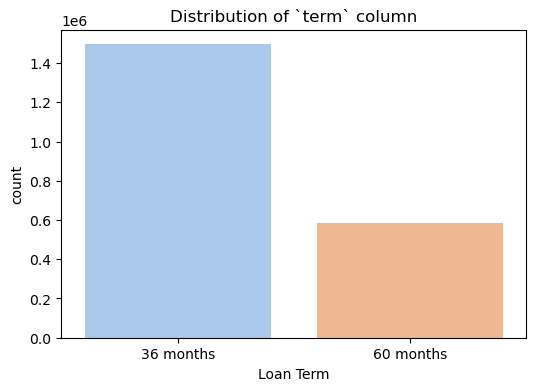

In [66]:
# Check distribution

# Create plot
plt.figure(figsize=(6,4))
sns.countplot(data=dfa_eda, x='term', palette='pastel')

# Set title, label, legend
plt.title('Distribution of `term` column')
plt.xlabel('Loan Term')

# Show plot
plt.show()

In [67]:
# Check counts
dfa_eda['term'].value_counts()

36 months    1495472
60 months     585895
Name: term, dtype: int64

✅ We will keep the `term` column for now.

---
<a id="2.11"></a>
#### 2.11 `home_ownership` column

This column shows the home ownership status provided by the borrower during registration.

In [68]:
# Check sample
dfa_eda['home_ownership'].sample(5)

2042959    MORTGAGE
801836     MORTGAGE
343018          OWN
1682392    MORTGAGE
1415374    MORTGAGE
Name: home_ownership, dtype: object

This is a categorical column.

Let us check for unique values.

In [69]:
# Check for unique values
dfa_eda['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'], dtype=object)

In [70]:
# Check counts
dfa_eda['home_ownership'].value_counts()

MORTGAGE    1005808
RENT         837359
OWN          237117
ANY             995
OTHER            45
NONE             43
Name: home_ownership, dtype: int64

This is a categorical column.

We see that 'ANY', 'OTHER', and 'NONE' categories have a total of 1083 (=995+45+43) entries.

We can drop the rows that have these three categories.

In [71]:
# Drop three categories
dfa_eda = dfa_eda[dfa_eda['home_ownership'].str.contains('ANY|OTHER|NONE')==False]

In [72]:
# Check counts
dfa_eda['home_ownership'].value_counts()

MORTGAGE    1005808
RENT         837359
OWN          237117
Name: home_ownership, dtype: int64

Let us now try to visualize the data.

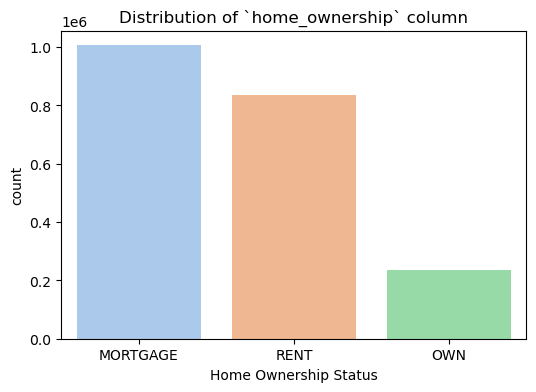

In [73]:
# Check distribution

# Create plot
plt.figure(figsize=(6,4))
sns.countplot(data=dfa_eda, x='home_ownership', palette='pastel')

# Set title, label, legend
plt.title('Distribution of `home_ownership` column')
plt.xlabel('Home Ownership Status')

# Show plot
plt.show()

✅ We will keep the `home_ownership` column for now.

---
<a id="2.12"></a>
#### 2.12 `annual_inc` column

This column shows the self-reported annual income provided by the borrower during registration.

In [74]:
# Check sample
dfa_eda['annual_inc'].sample(5)

686105     60000.0
1299542    24000.0
2213367    82600.0
915113     80000.0
1720622    50000.0
Name: annual_inc, dtype: float64

This is a numerical column.

Let us now try to visualize the data.

<Figure size 800x600 with 0 Axes>

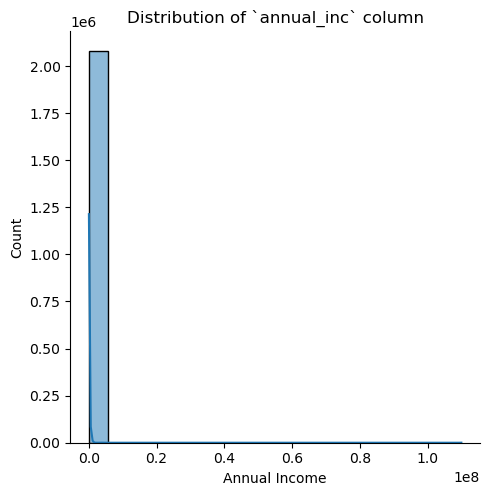

In [75]:
# Check distribution

# Create plot
plt.figure(figsize=(8,6))
sns.displot(data=dfa_eda, x='annual_inc', bins=20, kde=True, palette='pastel')

# Set title, label, legend
plt.title('Distribution of `annual_inc` column')
plt.xlabel('Annual Income')

# Show plot
plt.show()

The distribution seems to be right-skewed.

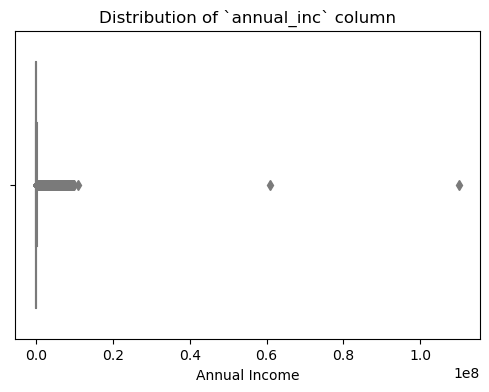

In [76]:
# Check distribution

# Create plot
plt.figure(figsize=(6,4))
sns.boxplot(data=dfa_eda, x='annual_inc', palette='pastel')

# Set title, label, legend
plt.title('Distribution of `annual_inc` column')
plt.xlabel('Annual Income')

# Show plot
plt.show()

There are outliers in the column.

In [77]:
# Check details
dfa_eda['annual_inc'].describe()

count    2.080284e+06
mean     7.928054e+04
std      1.162711e+05
min      1.900000e+03
25%      4.800000e+04
50%      6.600000e+04
75%      9.500000e+04
max      1.100000e+08
Name: annual_inc, dtype: float64

- Lowest annual income is \\$1900
- Highest annual income is \\$110 million
- Mean annual income is ~\\$80k (\\$79,280.54)

We could try to remove some outliers, but we are not sure on what parameters. We might end up removing important data. Knowing that the maximum available loan amount at Lending Club is \\$40k, it does seem surprising that borrowers with an annual income of \\$110 million are applying for loans here. But, we will keep the data as is for now.

✅ We will keep the `annual_inc` column for now.

---
<a id="2.13"></a>
#### 2.13 `verification_status` column

This column indicates whether the borrower's income was verified by Lending Club, not verified, or if the income source was verified.

In [78]:
# Check sample
dfa_eda['verification_status'].sample(5)

1788838    Not Verified
1394171        Verified
1312051        Verified
2077303    Not Verified
1289200        Verified
Name: verification_status, dtype: object

This is a categorical column.

Let us check for unique values.

In [79]:
# Checking for unique values
dfa_eda['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

There are three categories of verification status:
- Not Verified
- Source Verified
- Verified

Let us now try to visualize the data.

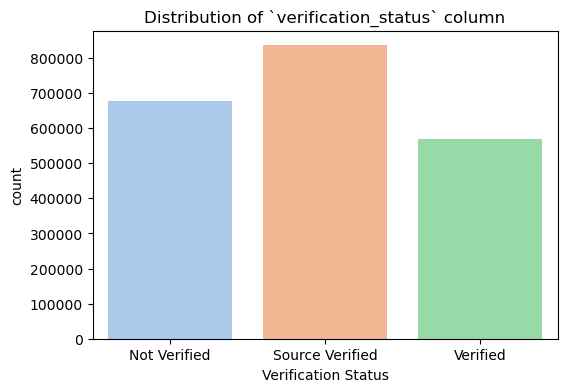

In [80]:
# Check distribution

# Create plot
plt.figure(figsize=(6,4))
sns.countplot(data=dfa_eda, x='verification_status', palette='pastel')

# Set title, label, legend
plt.title('Distribution of `verification_status` column')
plt.xlabel('Verification Status')

# Show plot
plt.show()

In [81]:
# Check counts
dfa_eda['verification_status'].value_counts()

Source Verified    835832
Not Verified       676006
Verified           568446
Name: verification_status, dtype: int64

✅ We will keep the `verification_status` column for now.

---
<a id="2.14"></a>
#### 2.14 `purpose` column

This column shows the loan category provided by the borrower for the loan request.

In [82]:
# Check sample
dfa_eda['purpose'].sample(5)

1904340    debt_consolidation
1549136           credit_card
1362014    debt_consolidation
1266665    debt_consolidation
266666     debt_consolidation
Name: purpose, dtype: object

This is a categorical column.

Let us check for unique values.

In [83]:
# Check for unique values
dfa_eda['purpose'].unique()

array(['debt_consolidation', 'small_business', 'major_purchase',
       'credit_card', 'other', 'home_improvement', 'house', 'vacation',
       'car', 'medical', 'moving', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

In [84]:
# Check for total unique values
dfa_eda['purpose'].nunique()

14

There are 14 unique categories for loan purpose.

Let us now try to visualize the data.

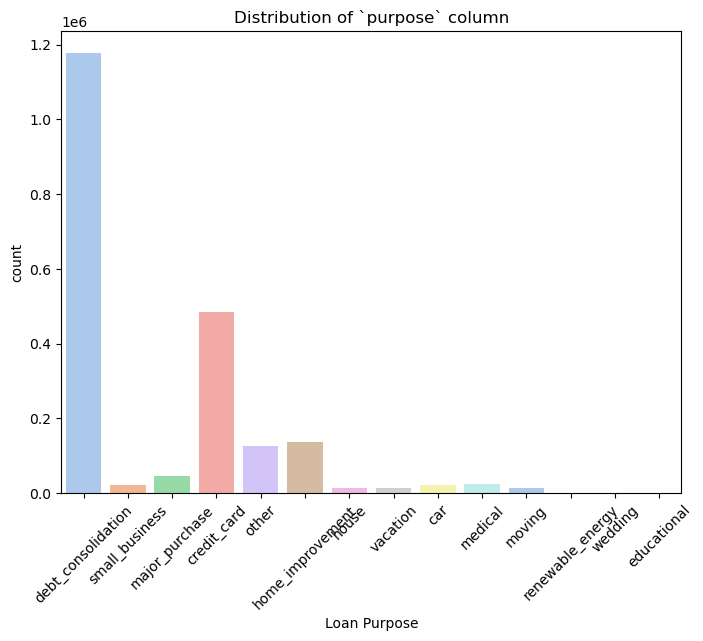

In [85]:
# Check distribution

# Create plot
plt.figure(figsize=(8,6))
sns.countplot(data=dfa_eda, x='purpose', palette='pastel');

# Set title, label, legend
plt.title('Distribution of `purpose` column')
plt.xlabel('Loan Purpose')

# Set xlabel angle
plt.xticks(rotation=45);

# Show plot
plt.show()

In [86]:
# Check counts
dfa_eda['purpose'].value_counts()

debt_consolidation    1177646
credit_card            485258
home_improvement       136278
other                  126609
major_purchase          45098
medical                 24275
small_business          20906
car                     20880
vacation                14343
moving                  13769
house                   12912
renewable_energy         1241
wedding                  1067
educational                 2
Name: purpose, dtype: int64

We notice that 'educational' loan purpose has only two entries. But we will keep it for now.

✅ We will keep the `purpose` column for now.

---
<a id="2.15"></a>
#### 2.15 `dti` column

dti = debt-to-income ratio

This column shows the ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested Lending Club loan, divided by the borrower’s self-reported monthly income.

In [87]:
# Check sample
dfa_eda['dti'].sample(5)

2185714     8.82
428104     10.78
625330     18.05
1685144    25.48
190968     20.00
Name: dti, dtype: float64

This is a numerical column.

Let us now try to visualize the data.

<Figure size 800x600 with 0 Axes>

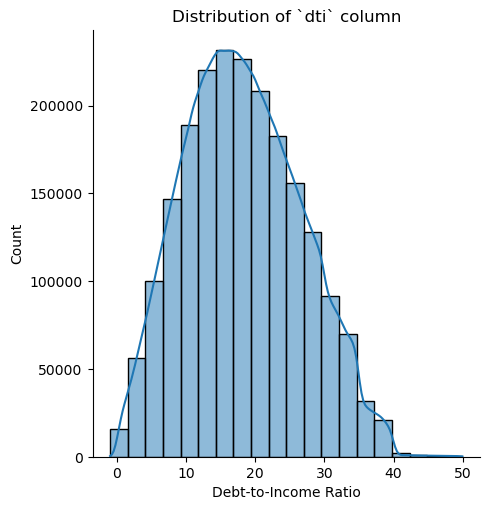

In [88]:
# Check distribution

# Create plot
plt.figure(figsize=(8,6))
sns.displot(data=dfa_eda, x='dti', bins=20, kde=True, palette='pastel')

# Set title, label, legend
plt.title('Distribution of `dti` column')
plt.xlabel('Debt-to-Income Ratio')

# Show plot
plt.show()

The distribution seems to be right-skewed.

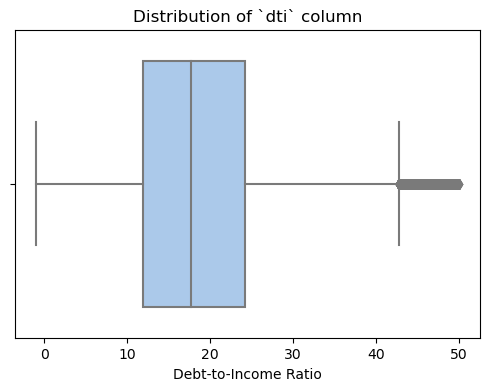

In [89]:
# Check distribution

# Create plot
plt.figure(figsize=(6,4))
sns.boxplot(data=dfa_eda, x='dti', palette='pastel')

# Set title, label, legend
plt.title('Distribution of `dti` column')
plt.xlabel('Debt-to-Income Ratio')

# Show plot
plt.show()

There are outliers in the column.

In [90]:
# Check details
dfa_eda['dti'].describe()

count    2.080284e+06
mean     1.821666e+01
std      8.436621e+00
min     -1.000000e+00
25%      1.188000e+01
50%      1.772000e+01
75%      2.421000e+01
max      4.996000e+01
Name: dti, dtype: float64

- Lowest dti ratio is -1
- Highest dti ratio is 49.96
- Mean dti ratio is ~18.22

According to [Debt.org](https://www.debt.org/credit/loans/personal/lending-club-review/), Lending Club prefers dti < 40 for Individual loan applicants. However, in this case, we will keep the column as is.

But we will remove the negative dti ratios.

In [91]:
# Drop negative dti
dfa_eda = dfa_eda[dfa_eda['dti'] >= 0]

In [92]:
# Check details
dfa_eda['dti'].describe()

count    2.080283e+06
mean     1.821667e+01
std      8.436612e+00
min      0.000000e+00
25%      1.188000e+01
50%      1.772000e+01
75%      2.421000e+01
max      4.996000e+01
Name: dti, dtype: float64

- Lowest dti ratio is 0
- Highest dti ratio is 49.96
- Mean dti ratio is ~18.22

✅ We will keep the `dti` column for now.

---
<a id="2.16"></a>
#### 2.16 `fico_range_low`, `fico_range_high` columns

The `fico_range_low` column shows the lower boundary range the borrower’s FICO at loan origination belongs to.

The `fico_range_high` column shows the upper boundary range the borrower’s FICO at loan origination belongs to.

In [93]:
# Check top/bottom rows
dfa_eda['fico_range_low'].head(), dfa_eda['fico_range_low'].tail()

(0    675.0
 1    715.0
 3    785.0
 4    695.0
 5    690.0
 Name: fico_range_low, dtype: float64,
 2260694    665.0
 2260695    695.0
 2260696    705.0
 2260697    660.0
 2260698    660.0
 Name: fico_range_low, dtype: float64)

In [94]:
# Check top/bottom rows
dfa_eda['fico_range_high'].head(), dfa_eda['fico_range_high'].tail()

(0    679.0
 1    719.0
 3    789.0
 4    699.0
 5    694.0
 Name: fico_range_high, dtype: float64,
 2260694    669.0
 2260695    699.0
 2260696    709.0
 2260697    664.0
 2260698    664.0
 Name: fico_range_high, dtype: float64)

After closer observation, the two columns have a difference of 4 for each row. We will take the average of both columns and create a new column `fico_range_avg` to store that value.

Then, we will drop these two existing columns.

In [95]:
# Mean of two columns
dfa_eda['fico_range_avg'] = dfa_eda[['fico_range_low', 'fico_range_high']].mean(axis=1)

In [96]:
# Check values
dfa_eda['fico_range_avg'].head(), dfa_eda['fico_range_avg'].tail()

(0    677.0
 1    717.0
 3    787.0
 4    697.0
 5    692.0
 Name: fico_range_avg, dtype: float64,
 2260694    667.0
 2260695    697.0
 2260696    707.0
 2260697    662.0
 2260698    662.0
 Name: fico_range_avg, dtype: float64)

The calculation worked correctly. We can see that the first row has a value of 677 (which is a mean of 675 and 679 from the original two columns).

Now we drop the two original columns, `fico_range_low` and `fico_range_high`.

In [97]:
# Drop two columns
dfa_eda.drop(['fico_range_low', 'fico_range_high'], axis=1, inplace=True)

In [98]:
# Check data frame shape
print(f'There are {dfa_eda.shape[0]} rows and {dfa_eda.shape[1]} columns.')

There are 2080283 rows and 18 columns.


In [99]:
# Check sample
dfa_eda['fico_range_avg'].sample(5)

1702819    667.0
1970504    687.0
2085770    747.0
2069528    672.0
767750     667.0
Name: fico_range_avg, dtype: float64

This is a numerical column.

Let us now try to visualize the data.

<Figure size 800x600 with 0 Axes>

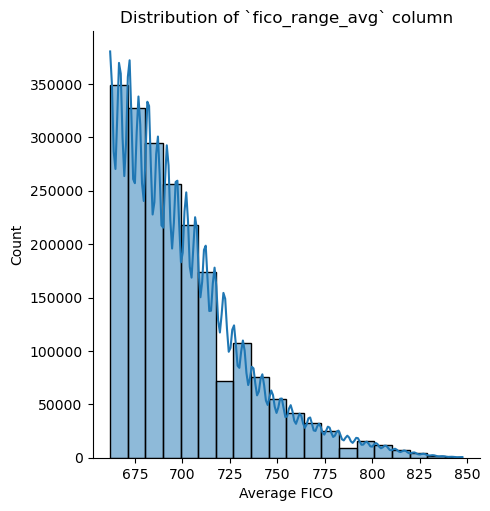

In [100]:
# Check distribution

# Create plot
plt.figure(figsize=(8,6))
sns.displot(data=dfa_eda, x='fico_range_avg', bins=20, kde=True, palette='pastel')

# Set title, label, legend
plt.title('Distribution of `fico_range_avg` column')
plt.xlabel('Average FICO')

# Show plot
plt.show()

The distribution seems to be right-skewed.

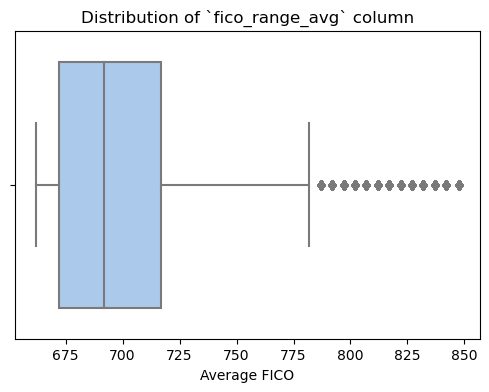

In [101]:
# Check distribution

# Create plot
plt.figure(figsize=(6,4))
sns.boxplot(data=dfa_eda, x='fico_range_avg', palette='pastel')

# Set title, label, legend
plt.title('Distribution of `fico_range_avg` column')
plt.xlabel('Average FICO')

# Show plot
plt.show()

There are outliers in the column.

In [102]:
# Check details
dfa_eda['fico_range_avg'].describe()

count    2.080283e+06
mean     6.994483e+02
std      3.224914e+01
min      6.620000e+02
25%      6.720000e+02
50%      6.920000e+02
75%      7.170000e+02
max      8.475000e+02
Name: fico_range_avg, dtype: float64

- Lowest FICO score is 662
- Highest FICO score is ~847
- Mean FICO score is ~700

✅ We will keep the `fico_range_avg` column for now.

---
<a id="2.17"></a>
#### 2.17 `open_acc` column

This column shows the number of open credit lines in the borrower's credit file.

In [103]:
# Check sample
dfa_eda['open_acc'].sample(5)

274948     11.0
663181     24.0
1564726    13.0
1786005    13.0
790834     36.0
Name: open_acc, dtype: float64

This is a numerical column.

Let us now try to visualize the data.

<Figure size 800x600 with 0 Axes>

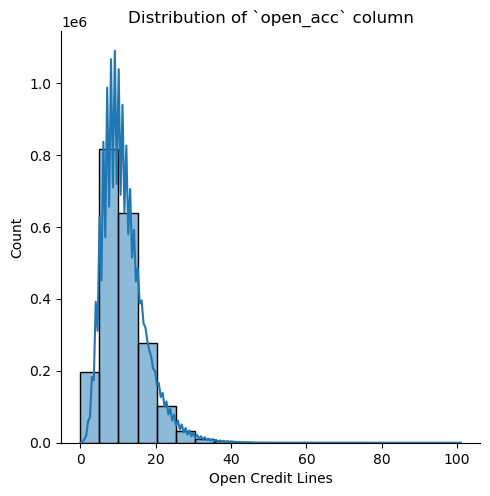

In [104]:
# Check distribution

# Create plot
plt.figure(figsize=(8,6))
sns.displot(data=dfa_eda, x='open_acc', bins=20, kde=True, palette='pastel')

# Set title, label, legend
plt.title('Distribution of `open_acc` column')
plt.xlabel('Open Credit Lines')

# Show plot
plt.show()

The distribution seems to be right-skewed.

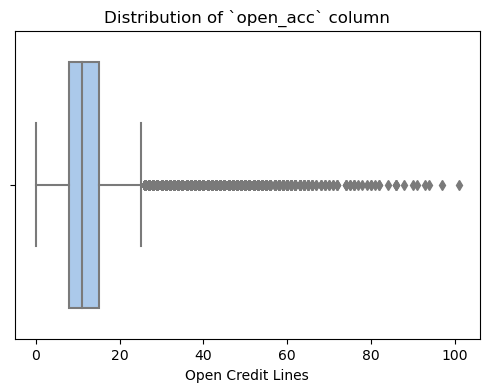

In [105]:
# Check distribution

# Create plot
plt.figure(figsize=(6,4))
sns.boxplot(data=dfa_eda, x='open_acc', palette='pastel')

# Set title, label, legend
plt.title('Distribution of `open_acc` column')
plt.xlabel('Open Credit Lines')

# Show plot
plt.show()

There are outliers in the column.

In [106]:
# Check details
dfa_eda['open_acc'].describe()

count    2.080283e+06
mean     1.170050e+01
std      5.662138e+00
min      0.000000e+00
25%      8.000000e+00
50%      1.100000e+01
75%      1.500000e+01
max      1.010000e+02
Name: open_acc, dtype: float64

- Minimum number of open credit lines is 0
- Highest number of open credit lines is 101
- Mean number of open credit lines is ~11.7

✅ We will keep the `open_acc` column for now.

---
<a id="2.18"></a>
#### 2.18 `total_acc` column

This column shows the total number of credit lines in the borrower's credit file.

In [107]:
# Check sample
dfa_eda['total_acc'].sample(5)

983632     24.0
212083     33.0
2247408    33.0
1313089    53.0
983714      7.0
Name: total_acc, dtype: float64

This is a numerical column.

Let us now try to visualize the data.

<Figure size 800x600 with 0 Axes>

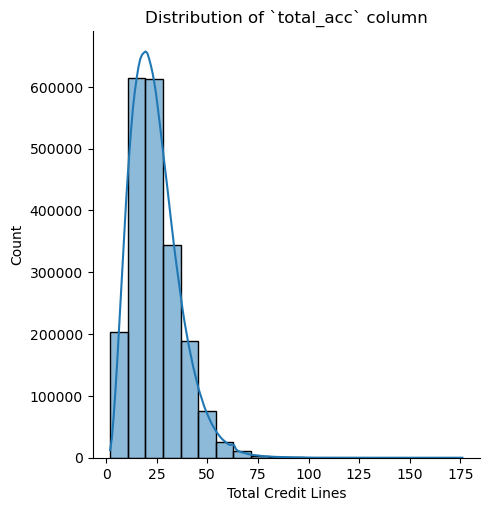

In [108]:
# Check distribution

# Create plot
plt.figure(figsize=(8,6))
sns.displot(data=dfa_eda, x='total_acc', bins=20, kde=True, palette='pastel')

# Set title, label, legend
plt.title('Distribution of `total_acc` column')
plt.xlabel('Total Credit Lines')

# Show plot
plt.show()

The distribution seems to be right-skewed.

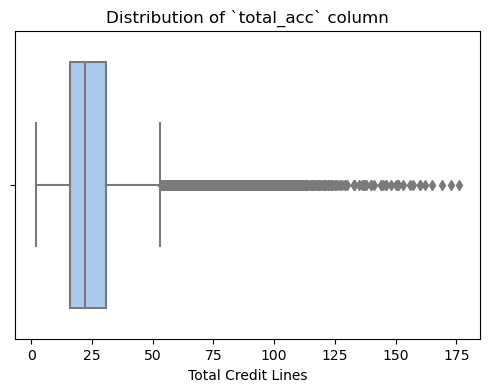

In [109]:
# Check distribution

# Create plot
plt.figure(figsize=(6,4))
sns.boxplot(data=dfa_eda, x='total_acc', palette='pastel')

# Set title, label, legend
plt.title('Distribution of `total_acc` column')
plt.xlabel('Total Credit Lines')

# Show plot
plt.show()

There are outliers in the column.

In [110]:
# Check details
dfa_eda['total_acc'].describe()

count    2.080283e+06
mean     2.430485e+01
std      1.202127e+01
min      2.000000e+00
25%      1.600000e+01
50%      2.200000e+01
75%      3.100000e+01
max      1.760000e+02
Name: total_acc, dtype: float64

- Minimum number of total credit lines is 2
- Highest number of total credit lines is 176
- Mean number of total credit lines is ~24.30

✅ We will keep the `total_acc` column for now.

---
<a id="2.19"></a>
#### 2.19 `disbursement_method` column

This column shows the method by which the borrower receives their loan.

In [111]:
# Check sample
dfa_eda['disbursement_method'].sample(5)

1990213    Cash
2203228    Cash
2047971    Cash
1215365    Cash
1405110    Cash
Name: disbursement_method, dtype: object

This is a categorical column.

Let us check for unique values.

In [112]:
# Check for unique values
dfa_eda['disbursement_method'].unique()

array(['Cash', 'DirectPay'], dtype=object)

There are two categories of disbursement methods:
- Cash
- DirectPay

Let us now try to visualize the data.

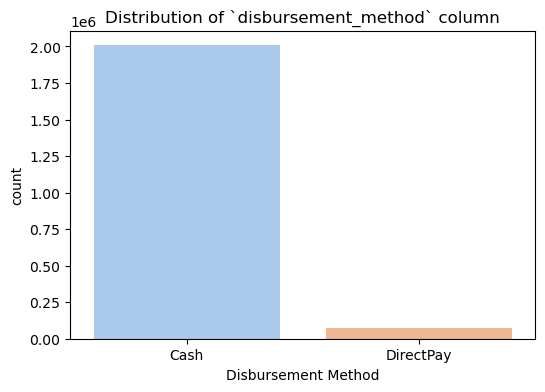

In [113]:
# Check distribution

# Create plot
plt.figure(figsize=(6,4))
sns.countplot(data=dfa_eda, x='disbursement_method', palette='pastel')

# Set title, label, legend
plt.title('Distribution of `disbursement_method` column')
plt.xlabel('Disbursement Method')

# Show plot
plt.show()

In [114]:
# Check counts
dfa_eda['disbursement_method'].value_counts()

Cash         2007325
DirectPay      72958
Name: disbursement_method, dtype: int64

✅ We will keep the `disbursement_method` column for now.

---
<a id="2.20"></a>
#### 2.20 `pub_rec` column

This column shows the number of derogatory public records.

In [115]:
# Check sample
dfa_eda['pub_rec'].sample(5)

2027166    0.0
2052310    0.0
1107618    0.0
1107095    0.0
355429     0.0
Name: pub_rec, dtype: float64

This is a numerical column.

In [116]:
# Check counts
dfa_eda['pub_rec'].value_counts()

0.0     1742341
1.0      286760
2.0       33243
3.0       10313
4.0        3792
5.0        1813
6.0         920
7.0         419
8.0         238
9.0         140
10.0         89
11.0         57
12.0         35
13.0         30
15.0         11
16.0         11
14.0         11
19.0          8
21.0          6
18.0          6
17.0          5
28.0          4
24.0          4
22.0          3
20.0          3
23.0          2
49.0          2
61.0          2
86.0          1
37.0          1
45.0          1
54.0          1
34.0          1
63.0          1
40.0          1
44.0          1
46.0          1
47.0          1
31.0          1
32.0          1
52.0          1
26.0          1
25.0          1
Name: pub_rec, dtype: int64

In [117]:
# Check details
dfa_eda['pub_rec'].describe()

count    2.080283e+06
mean     2.041020e-01
std      5.835758e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.600000e+01
Name: pub_rec, dtype: float64

- Lowest number of Derogatory Public Records is 0
- Highest number of Derogatory Public Records is 86
- Mean number of Derogatory Public Records is ~2.04

Looking at the counts, we can try to bin this column. We can bin it into two categories:
- 0 Derogatory Public Records
- 1+ Derogatory Public Records

In [118]:
# Create list of bins
pub_rec_bins = [-np.inf, 0, 86]
# Create labels for bins
pub_rec_labels = ['pub_rec_0_bin', 'pub_rec_1+_bin']

In [119]:
# Apply binning process to `pub_rec` column and save it in a new column `pub_rec_bin`
dfa_eda['pub_rec_bin'] = pd.cut(dfa_eda['pub_rec'], bins=pub_rec_bins, labels=pub_rec_labels)

In [120]:
# Check sample
dfa_eda['pub_rec_bin'].sample(5)

484025      pub_rec_0_bin
2024650    pub_rec_1+_bin
1883873    pub_rec_1+_bin
291115      pub_rec_0_bin
1233673    pub_rec_1+_bin
Name: pub_rec_bin, dtype: category
Categories (2, object): ['pub_rec_0_bin' < 'pub_rec_1+_bin']

Binning is successful.

Now we can drop the original `pub_rec` column.

In [121]:
# Drop column
dfa_eda.drop(['pub_rec'], axis=1, inplace=True)

In [122]:
# Check data frame shape
print(f'There are {dfa_eda.shape[0]} rows and {dfa_eda.shape[1]} columns.')

There are 2080283 rows and 18 columns.


Let us now try to visualize the data.

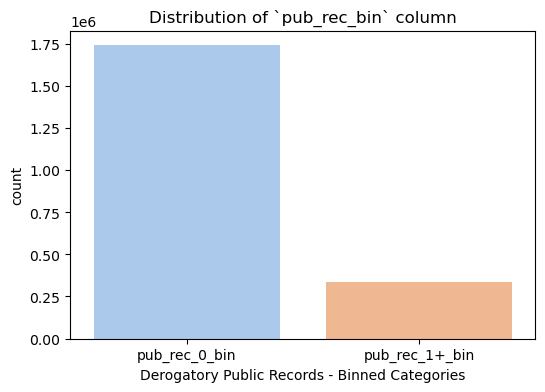

In [123]:
# Check distribution

# Create plot
plt.figure(figsize=(6,4))
sns.countplot(data=dfa_eda, x='pub_rec_bin', palette='pastel');

# Set title, label, legend
plt.title('Distribution of `pub_rec_bin` column')
plt.xlabel('Derogatory Public Records - Binned Categories')

# Show plot
plt.show()

In [124]:
# Check counts
dfa_eda['pub_rec_bin'].value_counts()

pub_rec_0_bin     1742341
pub_rec_1+_bin     337942
Name: pub_rec_bin, dtype: int64

✅ We will keep the `pub_rec_bin` column for now.

---
<a id="2.21"></a>
#### 2.21 `pub_rec_bankruptcies` column

This column shows the number of public record bankruptcies.

In [125]:
# Check sample
dfa_eda['pub_rec_bankruptcies'].sample(5)

379672     0.0
1608414    0.0
2060405    0.0
320057     0.0
1270436    0.0
Name: pub_rec_bankruptcies, dtype: float64

This is a numerical column.

In [126]:
# Check counts
dfa_eda['pub_rec_bankruptcies'].value_counts()

0.0     1825914
1.0      241248
2.0       10209
3.0        2093
4.0         536
5.0         187
6.0          59
7.0          22
8.0          10
9.0           3
11.0          1
12.0          1
Name: pub_rec_bankruptcies, dtype: int64

In [127]:
# Check details
dfa_eda['pub_rec_bankruptcies'].describe()

count    2.080283e+06
mean     1.305890e-01
std      3.688649e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.200000e+01
Name: pub_rec_bankruptcies, dtype: float64

- Lowest number of Public Record Bankruptcies is 0
- Highest number of Public Record Bankruptcies is 12
- Mean number of Public Record Bankruptcies is ~0.13

Looking at the counts, we can try to bin this column. We can bin it into two categories:
- 0 Public Record Bankruptcies
- 1+ Public Record Bankruptcies

In [128]:
# Create list of bins
pub_rec_bankruptcies_bins = [-np.inf, 0, 12]
# Create labels for bins
pub_rec_bankruptcies_labels = ['pub_rec_bankruptcies_0_bin', 'pub_rec_bankruptcies_1+_bin']

In [129]:
# Apply binning process to `pub_rec_bankruptcies` column and save it in a new column `pub_rec_bankruptcies_bin`
dfa_eda['pub_rec_bankruptcies_bin'] = pd.cut(dfa_eda['pub_rec_bankruptcies'],\
                                                  bins=pub_rec_bankruptcies_bins,\
                                                  labels=pub_rec_bankruptcies_labels)

In [130]:
# Check sample
dfa_eda['pub_rec_bankruptcies_bin'].sample(5)

1397038     pub_rec_bankruptcies_0_bin
338182     pub_rec_bankruptcies_1+_bin
133579      pub_rec_bankruptcies_0_bin
262809      pub_rec_bankruptcies_0_bin
1229187     pub_rec_bankruptcies_0_bin
Name: pub_rec_bankruptcies_bin, dtype: category
Categories (2, object): ['pub_rec_bankruptcies_0_bin' < 'pub_rec_bankruptcies_1+_bin']

Binning is successful.

Now we can drop the original `pub_rec_bankruptcies` column.

In [131]:
# Drop column
dfa_eda.drop(['pub_rec_bankruptcies'], axis=1, inplace=True)

In [132]:
# Check data frame shape
print(f'There are {dfa_eda.shape[0]} rows and {dfa_eda.shape[1]} columns.')

There are 2080283 rows and 18 columns.


Let us now try to visualize the data.

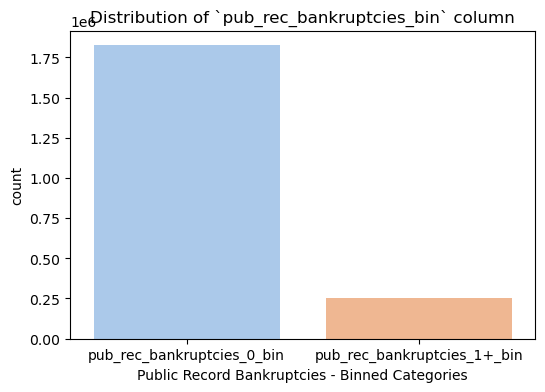

In [133]:
# Check distribution

# Create plot
plt.figure(figsize=(6,4))
sns.countplot(data=dfa_eda, x='pub_rec_bankruptcies_bin', palette='pastel');

# Set title, label, legend
plt.title('Distribution of `pub_rec_bankruptcies_bin` column')
plt.xlabel('Public Record Bankruptcies - Binned Categories')

# Show plot
plt.show()

In [134]:
# Check counts
dfa_eda['pub_rec_bankruptcies_bin'].value_counts()

pub_rec_bankruptcies_0_bin     1825914
pub_rec_bankruptcies_1+_bin     254369
Name: pub_rec_bankruptcies_bin, dtype: int64

✅ We will keep the `pub_rec_bankruptcies_bin` column for now.

---
<a id="2.22"></a>
#### 2.22 `tax_liens` column

This column shows the number of tax liens.

In [135]:
# Check sample
dfa_eda['tax_liens'].sample(5)

1422371    0.0
421599     0.0
2168033    0.0
2253920    0.0
443496     0.0
Name: tax_liens, dtype: float64

This is a numerical column.

In [136]:
# Check counts
dfa_eda['tax_liens'].value_counts()

0.0     2017217
1.0       42554
2.0       11883
3.0        4344
4.0        1966
5.0        1014
6.0         547
7.0         259
8.0         156
9.0         102
10.0         72
11.0         40
12.0         26
13.0         17
15.0         14
14.0         11
17.0          8
21.0          6
16.0          6
18.0          5
22.0          5
20.0          3
19.0          3
27.0          3
61.0          2
45.0          2
24.0          2
46.0          2
29.0          1
44.0          1
30.0          1
52.0          1
37.0          1
39.0          1
63.0          1
34.0          1
28.0          1
25.0          1
48.0          1
53.0          1
23.0          1
85.0          1
Name: tax_liens, dtype: int64

In [137]:
# Check details
dfa_eda['tax_liens'].describe()

count    2.080283e+06
mean     4.965767e-02
std      3.897481e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.500000e+01
Name: tax_liens, dtype: float64

- Lowest number of tax liens is 0
- Highest number of tax liens is 85
- Mean number of tax liens is ~0.05

Looking at the counts, we can try to bin this column. We can bin it into two categories:
- 0 Tax Liens
- 1+ Tax Liens

In [138]:
# Create list of bins
tax_liens_bins = [-np.inf, 0, 85]
# Create labels for bins
tax_liens_labels = ['tax_liens_0_bin', 'tax_liens_1+_bin']

In [139]:
# Apply binning process to `tax_liens` column and save it in a new column `tax_liens_bin`
dfa_eda['tax_liens_bin'] = pd.cut(dfa_eda['tax_liens'],\
                                    bins=tax_liens_bins,\
                                    labels=tax_liens_labels)

In [140]:
# Check sample
dfa_eda['tax_liens_bin'].sample(5)

259745     tax_liens_0_bin
1193802    tax_liens_0_bin
477728     tax_liens_0_bin
821385     tax_liens_0_bin
987751     tax_liens_0_bin
Name: tax_liens_bin, dtype: category
Categories (2, object): ['tax_liens_0_bin' < 'tax_liens_1+_bin']

Binning is successful.

Now we can drop the original `tax_liens` column.

In [141]:
# Drop column
dfa_eda.drop(['tax_liens'], axis=1, inplace=True)

In [142]:
# Check data frame shape
print(f'There are {dfa_eda.shape[0]} rows and {dfa_eda.shape[1]} columns.')

There are 2080283 rows and 18 columns.


Let us now try to visualize the data.

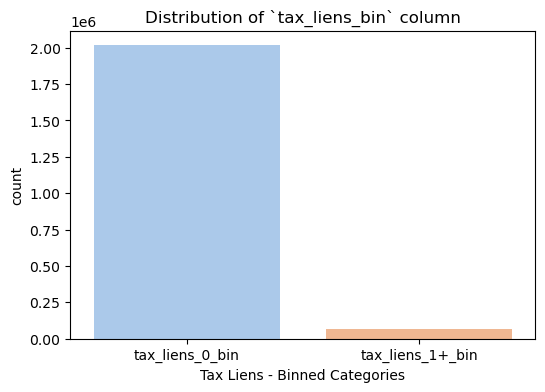

In [143]:
# Check distribution

# Create plot
plt.figure(figsize=(6,4))
sns.countplot(data=dfa_eda, x='tax_liens_bin', palette='pastel');

# Set title, label, legend
plt.title('Distribution of `tax_liens_bin` column')
plt.xlabel('Tax Liens - Binned Categories')

# Show plot
plt.show()

In [144]:
# Check counts
dfa_eda['tax_liens_bin'].value_counts()

tax_liens_0_bin     2017217
tax_liens_1+_bin      63066
Name: tax_liens_bin, dtype: int64

✅ We will keep the `tax_liens_bin` column for now.

---
<a id="3"></a>
### 3. Data Export

In [145]:
# Check data frame shape
print(f'There are {dfa_eda.shape[0]} rows and {dfa_eda.shape[1]} columns.')

There are 2080283 rows and 18 columns.


We will make a copy of the modified `dfa_eda` data frame and save it as a new data frame `dfa_prep` for use in the next Jupyter notebook (3_Model_Prep).

We will then delete the `dfa_eda` data frame.

In [146]:
# Make copy of data frame
dfa_prep = dfa_eda.copy(deep=True)

In [147]:
# Check data frame shape
print(f'There are {dfa_prep.shape[0]} rows and {dfa_prep.shape[1]} columns.')

There are 2080283 rows and 18 columns.


The data frame shapes match.

We can now delete the `dfa_eda` data frame.

In [148]:
# Delete data frame
del dfa_eda

In [149]:
# Export data frame
joblib.dump(dfa_prep, 'data/dfa_prep.pkl')

['data/dfa_prep.pkl']

In the next Jupyter notebook (3_Model_Prep), we will perform final checks and prepare the `dfa_prep` data frame for machine learning models.

**THE END**